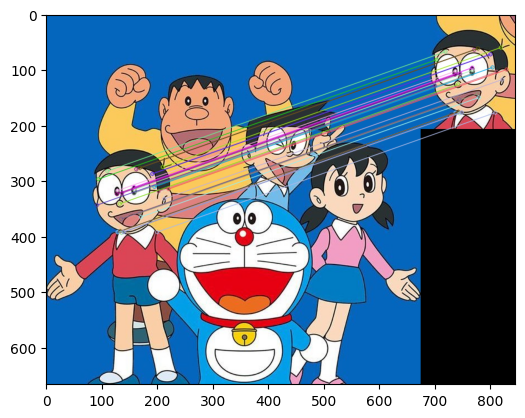

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Gunakan gambar yang ada pada laptop masing-masing
img1 = cv2.imread('Doraemon2.jpg') # gambar yang dituju
img2 = cv2.imread('Doraemon1.jpg') # gambar yang dicari
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Menggunakan Detector SIFT
sift = cv2.SIFT_create()

# Mencari Keypoint dengan SIFT
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Melakukan Matching dari hasil deteksi keypoints menggunakan Brute-Force Matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)

# Mengurutkan hasil matching berdasarkan jarak
matches = sorted(matches, key=lambda x: x.distance)

# Menggambar hanya sejumlah tertentu (misalnya 30) pasangan kecocokan terbaik
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:30], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Menampilkan gambar
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()